# STEP 1: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# STEP 2 : DATACOLLECTION AND PREPROCESSING

In [3]:
#loading the CSV data to Pandas DataFrame

gold = pd.read_csv("gld_price_data.csv")

In [4]:
#print first 5 rows in the dataframe

gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows in the dataframe

gold.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns

gold.shape

(2290, 6)

In [8]:
#getting some basic  information of the data

gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#checking the number of missing values in the coulmns of DataFrame
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
#getting some basic statistical information of the data

gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORRELATION
----------------------

1) pOSITIVE CORRELATION:
-------------------------
Positive correlation is a relationship between two variables in which both variables move in tandem—that is, in the same direction. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

2) Negative CORRELATION:
--------------------------

Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa.

In [12]:
correlation = gold.corr()

In [13]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

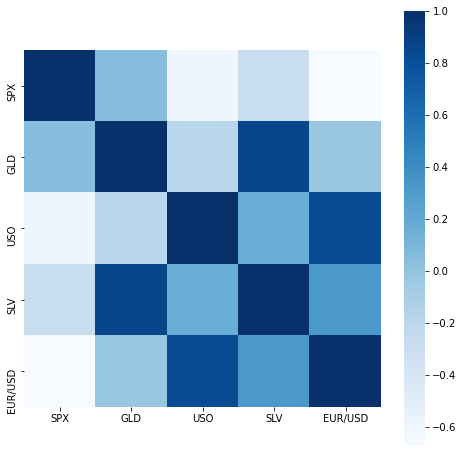

In [15]:
#constructing the heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot_kws ={'size':8}, cmap = 'Blues' )

In [16]:
#correlation values of gold

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Conda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

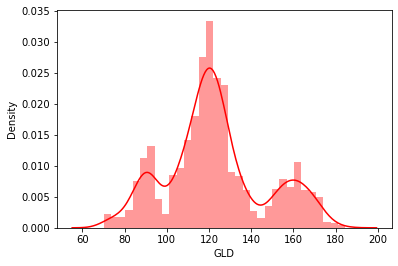

In [17]:
# checking the distribution of the gold price

sns.distplot(gold['GLD'], color = 'red')

# STEP 3: SPLITTING THE FEATURES AND TARGET

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
x = gold.drop(['GLD','Date'], axis=1)  # to drop the columns we can use axis=1 , for rows axis=0
y = gold['GLD']

In [21]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# STEP 4 : SPLITTING INTO TRAING DATA AND TESTING DATA

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=2)

In [27]:
x_train.shape

(1832, 4)

In [28]:
x_test.shape

(458, 4)

In [29]:
y_train.shape

(1832,)

In [30]:
y_test.shape

(458,)

# STEP 4: Model Training : Random Forest Regressor

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

# STEP 5 : MODEL EVALUTION

In [33]:
#prediction on test data

Test_data_Prediction = regressor.predict(x_test)

In [34]:
print(Test_data_Prediction)

[168.70139926  81.95459998 116.20100043 127.51480083 120.82620148
 154.81189742 150.4442991  126.22450037 117.49199865 126.00160084
 116.48740102 171.49220091 141.86129843 167.99789869 115.14220023
 117.72520058 138.44580339 170.39960119 159.49850247 160.28799936
 155.10050013 125.41309993 176.19979881 157.21430363 125.1828005
  93.73879969  77.35160004 120.71189993 119.15769966 167.46930004
  88.18850051 125.13250002  91.11930103 117.7878003  121.06509889
 136.88760061 115.57260135 115.06790119 147.1930991  107.24140064
 104.19410244  87.22729802 126.46920047 117.8428004  152.27709872
 119.62080005 108.3639995  108.19899848  93.23730058 127.25889719
  75.82040006 113.79639945 121.24580007 111.21699908 118.87929911
 120.65469945 158.06930032 168.10700121 146.9754965   85.84409845
  94.42900028  86.71249885  90.56670058 119.1553005  126.45570097
 127.57960016 170.64320032 122.18429993 117.49469876  98.92230047
 167.38020099 143.23079857 132.27320263 121.15400192 121.43129926
 119.700900

In [37]:
# R Squared error

error_score = metrics.r2_score(y_test,Test_data_Prediction) # checking accuracy for actual and predicted values

In [38]:
print(error_score)

0.9884520565378588


# STEP 6 : COMPARE THE ACTUAL VALUES AND PREDICTED VALUES IN A PLOT

In [39]:
y_test = list(y_test)

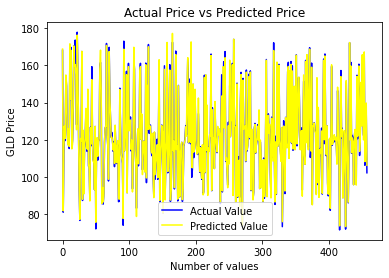

In [42]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(Test_data_Prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()